<a href="https://colab.research.google.com/github/BIGBOSS-FOX/CS-513-Final-Project-Job-Termination-Classification/blob/master/Random_Forest_Final_Project_Daoyuan_Chen_%26_Haopeng_Hu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the "attrition_data.csv"

In [1]:
import pandas as pd

data = pd.read_csv("attrition_data.csv")

data

,EMP_ID,ANNUAL_RATE,HRLY_RATE,JOBCODE,ETHNICITY,SEX,MARITAL_STATUS,JOB_SATISFACTION,AGE,NUMBER_OF_TEAM_CHANGED,REFERRAL_SOURCE,HIRE_MONTH,REHIRE,TERMINATION_YEAR,IS_FIRST_JOB,TRAVELLED_REQUIRED,PERFORMANCE_RATING,DISABLED_EMP,DISABLED_VET,EDUCATION_LEVEL,STATUS,JOB_GROUP,PREVYR_1,PREVYR_2,PREVYR_3,PREVYR_4,PREVYR_5
0,3285941608,33615,22,71850,BLACK,F,Divorced,4,35,3+,Client Referral,June,False,2008.0,N,N,4,N,N,LEVEL 2,T,Plant & Facilities Maintenance,0,0,0,0,0
1,3687079832,70675,40,59806,ASIAN,M,Single,3,18,3+,Executive Referral,June,False,NaN,Y,N,3,N,N,LEVEL 1,A,Customer Care,3,3,3,2,3
2,7209970080,34320,23,60311,WHITE,F,Single,5,18,2,Former Employee/Intern,February,False,NaN,Y,N,3,N,N,LEVEL 1,A,Customer Care,3,3,3,2,3
3,9084013977,103199,59,16233,ASIAN,F,Single,2,50,0,Direct Sourcing,October,True,2005.0,N,Y,2,N,N,LEVEL 1,T,Finance,0,0,0,0,0
4,4566148978,141801,71,64415,ASIAN,F,Single,4,34,3,Inroads,May,False,NaN,N,N,4,N,N,LEVEL 1,A,Marketing - Direct,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,8595959073,34636,23,58258,ASIAN,F,Single,1,43,0,Staffing Agency,July,False,NaN,N,N,1,N,Y,LEVEL 1,A,Physical Flows,0,0,0,0,0
9608,4606362550,34962,27,58258,WHITE,F,Single,5,28,2,NaN,November,False,NaN,N,N,1,N,N,LEVEL 3,A,Physical Flows,0,0,0,0,0
9609,5856364670,39286,27,36545,WHITE,F,Single,3,31,2,Executive Referral,February,False,NaN,N,N,1,N,N,LEVEL 3,A,Production & Operations,0,0,0,0,0
9610,5388746486,39145,27,44203,WHITE,M,Married,4,32,3+,Open House,February,False,NaN,N,N,4,N,N,LEVEL 2,A,Production & Operations,0,0,0,0,0


# Drop "EMP_ID" and "TERMINATION_YEAR"

In [2]:
data.drop(["EMP_ID", "TERMINATION_YEAR"], axis=1, inplace=True)

data

,ANNUAL_RATE,HRLY_RATE,JOBCODE,ETHNICITY,SEX,MARITAL_STATUS,JOB_SATISFACTION,AGE,NUMBER_OF_TEAM_CHANGED,REFERRAL_SOURCE,HIRE_MONTH,REHIRE,IS_FIRST_JOB,TRAVELLED_REQUIRED,PERFORMANCE_RATING,DISABLED_EMP,DISABLED_VET,EDUCATION_LEVEL,STATUS,JOB_GROUP,PREVYR_1,PREVYR_2,PREVYR_3,PREVYR_4,PREVYR_5
0,33615,22,71850,BLACK,F,Divorced,4,35,3+,Client Referral,June,False,N,N,4,N,N,LEVEL 2,T,Plant & Facilities Maintenance,0,0,0,0,0
1,70675,40,59806,ASIAN,M,Single,3,18,3+,Executive Referral,June,False,Y,N,3,N,N,LEVEL 1,A,Customer Care,3,3,3,2,3
2,34320,23,60311,WHITE,F,Single,5,18,2,Former Employee/Intern,February,False,Y,N,3,N,N,LEVEL 1,A,Customer Care,3,3,3,2,3
3,103199,59,16233,ASIAN,F,Single,2,50,0,Direct Sourcing,October,True,N,Y,2,N,N,LEVEL 1,T,Finance,0,0,0,0,0
4,141801,71,64415,ASIAN,F,Single,4,34,3,Inroads,May,False,N,N,4,N,N,LEVEL 1,A,Marketing - Direct,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,34636,23,58258,ASIAN,F,Single,1,43,0,Staffing Agency,July,False,N,N,1,N,Y,LEVEL 1,A,Physical Flows,0,0,0,0,0
9608,34962,27,58258,WHITE,F,Single,5,28,2,NaN,November,False,N,N,1,N,N,LEVEL 3,A,Physical Flows,0,0,0,0,0
9609,39286,27,36545,WHITE,F,Single,3,31,2,Executive Referral,February,False,N,N,1,N,N,LEVEL 3,A,Production & Operations,0,0,0,0,0
9610,39145,27,44203,WHITE,M,Married,4,32,3+,Open House,February,False,N,N,4,N,N,LEVEL 2,A,Production & Operations,0,0,0,0,0


# Replace all " " with a random ethnicity in "ETHNICITY"

In [3]:
pd.unique(data['ETHNICITY'])

array(['BLACK', 'ASIAN', 'WHITE', 'HISPA', 'PACIF', 'TWO', 'AMIND', ' '],
      dtype=object)

In [4]:
import random
random_ethnicity = random.choice(data[data['ETHNICITY'] != " "]['ETHNICITY'])
random_ethnicity

'WHITE'

In [5]:
index_list = data.index[data['ETHNICITY'] == " "].tolist()
index_list

[2934]

In [0]:
data['ETHNICITY'].replace(" ", random_ethnicity, inplace = True)

In [7]:
data['ETHNICITY'][index_list[0]]

'WHITE'

In [8]:
pd.unique(data['ETHNICITY'])

array(['BLACK', 'ASIAN', 'WHITE', 'HISPA', 'PACIF', 'TWO', 'AMIND'],
      dtype=object)

In [9]:
data['ETHNICITY'].describe(include='all')

count      9612
unique        7
top       WHITE
freq       5821
Name: ETHNICITY, dtype: object

# Replace all " " with "Unknown" in "REFERRAL_SOURCE"

In [10]:
pd.unique(data['REFERRAL_SOURCE'])

array(['Client Referral', 'Executive Referral', 'Former Employee/Intern',
       'Direct Sourcing', 'Inroads', 'Unknown', nan, 'Job Fair',
       'Print Advertisement', 'Corporate Career Site', 'Agency',
       'College Recommendation', 'Job Posting',
       'Job Boards/Online Advertising', 'Open House',
       'College Recruiting(UnderGrad)', 'E-Strat', 'Unsolicited',
       'Staffing Agency', 'Other Source'], dtype=object)

In [0]:
data['REFERRAL_SOURCE'].fillna('Unknown', inplace=True)

In [12]:
pd.unique(data['REFERRAL_SOURCE'])

array(['Client Referral', 'Executive Referral', 'Former Employee/Intern',
       'Direct Sourcing', 'Inroads', 'Unknown', 'Job Fair',
       'Print Advertisement', 'Corporate Career Site', 'Agency',
       'College Recommendation', 'Job Posting',
       'Job Boards/Online Advertising', 'Open House',
       'College Recruiting(UnderGrad)', 'E-Strat', 'Unsolicited',
       'Staffing Agency', 'Other Source'], dtype=object)

In [13]:
data['REFERRAL_SOURCE'].describe(include='all')

count        9612
unique         19
top       Unknown
freq          917
Name: REFERRAL_SOURCE, dtype: object

In [14]:
data['REFERRAL_SOURCE']

0              Client Referral
1           Executive Referral
2       Former Employee/Intern
3              Direct Sourcing
4                      Inroads
                 ...          
9607           Staffing Agency
9608                   Unknown
9609        Executive Referral
9610                Open House
9611               Job Posting
Name: REFERRAL_SOURCE, Length: 9612, dtype: object

# Perform min-max scaling each numerical feature column to the range [0,1]

In [15]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
num = ['ANNUAL_RATE', 'HRLY_RATE', 'JOB_SATISFACTION', 'AGE', 'PERFORMANCE_RATING', 'PREVYR_1', 'PREVYR_2', 'PREVYR_3', 'PREVYR_4', 'PREVYR_5']
dataset_num = data[num].values
mms.fit(dataset_num)
dataset_num_norm = mms.transform(dataset_num)
dataset_num_norm

array([[0.01363624, 0.01346801, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.0436653 , 0.04377104, 0.5       , ..., 0.6       , 0.4       ,
        0.6       ],
       [0.01420749, 0.01515152, 1.        , ..., 0.6       , 0.4       ,
        0.6       ],
       ...,
       [0.01823135, 0.02188552, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.0181171 , 0.02188552, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.05991226, 0.06060606, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Perform one-hot encoding on each categorical feature column

In [16]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
cat = ['JOBCODE', 'ETHNICITY', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'REFERRAL_SOURCE', 'HIRE_MONTH', 'REHIRE', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'EDUCATION_LEVEL', 'JOB_GROUP']
dataset_cat = data[cat].values
# format all fields as string
dataset_cat = dataset_cat.astype(str)
ohe.fit(dataset_cat)
dataset_cat_enc = ohe.transform(dataset_cat).todense()
dataset_cat_enc

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

# Perform one-hot encoding on label column

In [17]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
dataset_label = data['STATUS'].values
lb.fit(dataset_label)
dataset_label_enc = lb.transform(dataset_label)
dataset_label_enc

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# Concatenate normalized numerical features and one-hot encoded categorical features into `X` and denote label by `y`

In [18]:
import numpy as np

X = np.hstack([dataset_num_norm, dataset_cat_enc])
y = dataset_label_enc
X.shape, y.shape

((9612, 1457), (9612, 1))

# Use 30% test 70% training data

In [19]:
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6728, 1457), (2884, 1457), (6728, 1), (2884, 1))

# Train a random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Evaluate the accuracy of the prediction

In [21]:
# model accuracy on test data
rfc.score(X_test, y_test)

0.7555478502080444

In [22]:
# prediction from random forest model
y_pred = rfc.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [23]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1389,  235],
       [ 470,  790]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(69.0, 0.5, 'y_test')

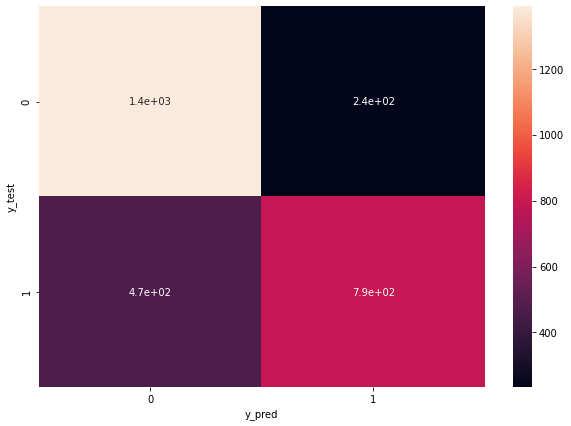

In [24]:
# plot the confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('y_pred')
plt.ylabel('y_test')